In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
from google.colab import files
import matplotlib.pyplot as plt

In [ ]:
Movies_all = []
Movie_allyear = []
Movie_imdb_rating = []
Movie_meta_score = []
Movie_allvotes = []

In [ ]:
url = "https://www.imdb.com/search/title/"
page  = requests.get(url)
page.content
soup = BeautifulSoup(page.content, "html.parser")
print(soup.prettify)

<bound method Tag.prettify of 
<!DOCTYPE html>

<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
<script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
<title>IMDb: Advanced Title Search - IMDb</title>
<script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
<script>
    if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
</script>
<script>
    if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {wb: 1});
    }
</script>
<link href="https://www.imdb.com/search/title/" rel="canonical"/>
<meta content="http://www.imdb.com/search/title/" property="og:url">
<script>
    if

In [ ]:
base_site = "https://www.imdb.com/search/title/"
year = 2010
while year < 2021:
  start = 1
  while start < 5000:
    r = requests.get(base_site, params = {"title_type": "feature","release_date":year, "sort": "release_date,asc","start":start })
    html = r.content
    data = BeautifulSoup(html , "lxml")
    fect = data.find_all('div', {"class":"inline-block ratings-metascore"})
    Div_meta = [x.parent.parent for x in fect]
    for div in Div_meta:
      try:
        names = div.find('a').getText().strip()
      except:
        names ="NA"
      Movies_all.append(names)
    for div in Div_meta:
      try:
        release_year = div.find("span",  {"class": "lister-item-year text-muted unbold"}).getText()[-6:].strip()
        release_year = release_year.strip('()')
        release_year = int(release_year)
      except:
        release_year ="NA"
      Movie_allyear.append(release_year)
    for div in Div_meta:
      try:
        Imdb_rating = div.find("strong").getText().strip()
      except:
        Imdb_rating = "NA"
      Movie_imdb_rating.append(Imdb_rating)
    for div in Div_meta:
      try:
        meta_score = div.find("span",  {"class": re.compile('metascore*')}).getText().strip()
      except:
        meta_score = "NA"
      Movie_meta_score.append(meta_score)
    for div in Div_meta:
      try:
        vote_count = div.find("span",  {"name": "nv"}).getText().strip()
      except:
        vote_count = "NA"
      Movie_allvotes.append(vote_count)
    start += 50
  year += 1

In [ ]:
req = {'Movies': Movies_all, 'Release': Movie_allyear, 'imdb_Rate': Movie_imdb_rating, 'Meta_score':Movie_meta_score, 'Vote': Movie_allvotes}
df = pd.DataFrame(req)
df

,Movies,Release,imdb_Rate,Meta_score,Vote
0,Repo Men,2010,6.3,32,"107,468"
1,Leap Year,2010,6.4,33,"105,060"
2,Crazy on the Outside,2010,5.5,21,"6,431"
3,Sex & Drugs & Rock & Roll,2010,6.5,57,"4,297"
4,The Killing Jar,2010,5.8,14,"2,764"
...,...,...,...,...,...
4163,Words on Bathroom Walls,2020,7.1,61,"10,660"
4164,Fully Realized Humans,2020,5.2,66,188
4165,Shithouse,2020,6.8,72,"5,338"
4166,The One and Only Ivan,2020,6.5,58,"12,446"


In [ ]:
df.to_csv('imdb_excel.csv', index=False)
files.download("imdb_excel.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
uploaded = files.upload()

Saving imdb_excel.csv to imdb_excel (1).csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['imdb_excel.csv']),index_col=False)
df

,Movies,Release,imdb_Rate,Meta_score,Vote
0,Repo Men,2010,6.3,32,"107,468"
1,Leap Year,2010,6.4,33,"105,060"
2,Crazy on the Outside,2010,5.5,21,"6,431"
3,Sex & Drugs & Rock & Roll,2010,6.5,57,"4,297"
4,The Killing Jar,2010,5.8,14,"2,764"
...,...,...,...,...,...
4163,Words on Bathroom Walls,2020,7.1,61,"10,660"
4164,Fully Realized Humans,2020,5.2,66,188
4165,Shithouse,2020,6.8,72,"5,338"
4166,The One and Only Ivan,2020,6.5,58,"12,446"


In [ ]:
import seaborn as sns




Text(0.5, 1.0, 'Metascore')

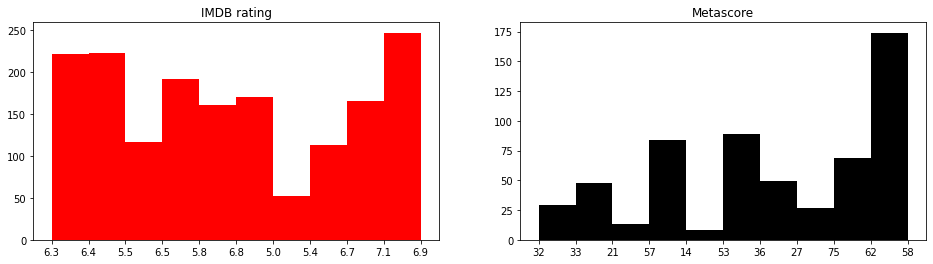

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (16,4))
ax1, ax2 = fig.axes
ax1.hist(req['imdb_Rate'], bins = 10, color='red', range = (0,10)) # bin range = 1
ax1.set_title('IMDB rating')
ax2.hist(req['Meta_score'], bins = 10, color='black', range = (0,10)) # bin range = 10
ax2.set_title('Metascore')